In [ ]:
import tensorflow as tf
from tensorflow import keras

cifar10 = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images = train_images / 255.0
test_images  = test_images / 255.0

train_images = tf.reshape(train_images, (50000, 32, 32, 3))
test_images  = tf.reshape(test_images, (10000, 32, 32, 3))

# model
model = keras.models.Sequential()
model.add(tf.keras.Input(shape=(32, 32, 3)))
model.add(keras.layers.Conv2D(4, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2))

# flatten
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
history_data = model.fit(train_images, train_labels, batch_size=1024,
                         validation_data=(test_images, test_labels), epochs=50)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 4)         112       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 4)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 900)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               115328    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 116,730
Trainable params: 116,730
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
49/49 [==============================] - 1s 21ms/step - loss: 2.2180 - accuracy: 0.1862 - val_loss: 1.8

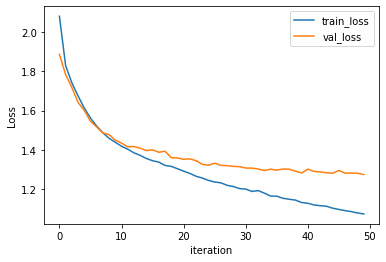

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_data.history['loss'], label = "train_loss")
plt.plot(history_data.history['val_loss'], label = "val_loss")
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

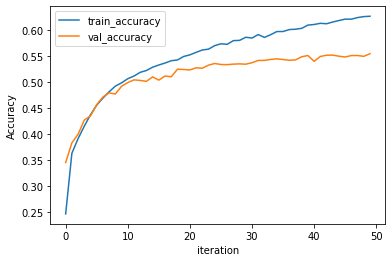

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_data.history['accuracy'], label = "train_accuracy")
plt.plot(history_data.history['val_accuracy'], label = "val_accuracy")
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
cifar10 = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images = train_images.reshape(-1,32,32,3)
train_images = tf.convert_to_tensor(train_images, dtype=tf.float32)
print(train_images.shape)

dx, dy = tf.image.image_gradients(train_images)
#sobel = tf.image.sobel_edges(train_images)
print(dx.shape)

(50000, 32, 32, 3)
(50000, 32, 32, 3)


In [ ]:
import tensorflow as tf
from tensorflow import keras

def construct_model():
  inp = keras.layers.Input(shape=[32,32,3])  
  
  # get edges
  edges = tf.image.sobel_edges(inp)
  edges = tf.keras.layers.Reshape((32,32,6))(edges)

  # get gradient
  dx, dy = tf.image.image_gradients(inp)
  x = tf.keras.layers.Concatenate(axis=3)([dx, dy, edges])

  x = tf.keras.layers.Reshape((32,32,12))(x)

  x = keras.layers.MaxPooling2D(2)(x)
  x = keras.layers.Flatten()(x)
  x = keras.layers.Dense(128, activation='relu')(x)
  x = keras.layers.Dense(10, activation='softmax')(x)

  return tf.keras.Model(inputs=[inp], outputs=x)




cifar10 = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images = train_images / 255.0
test_images  = test_images / 255.0

train_images = tf.reshape(train_images, (50000, 32, 32, 3))
test_images  = tf.reshape(test_images, (10000, 32, 32, 3))

# model
model = construct_model()
model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
history_data = model.fit(train_images, train_labels, batch_size=1024,
                         validation_data=(test_images, test_labels), epochs=1)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
tf.compat.v1.shape_3 (TFOpLambd (4,)                 0           input_2[0][0]                    
__________________________________________________________________________________________________
tf.compat.v1.shape_2 (TFOpLambd (4,)                 0           input_2[0][0]                    
__________________________________________________________________________________________________
tf.unstack_1 (TFOpLambda)       [(), (), (), ()]     0           tf.compat.v1.shape_3[0][0]       
____________________________________________________________________________________________

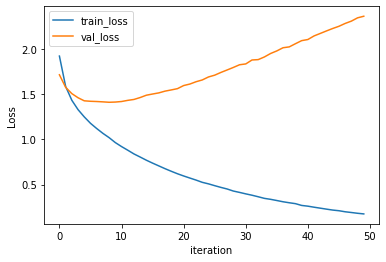

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_data.history['loss'], label = "train_loss")
plt.plot(history_data.history['val_loss'], label = "val_loss")
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

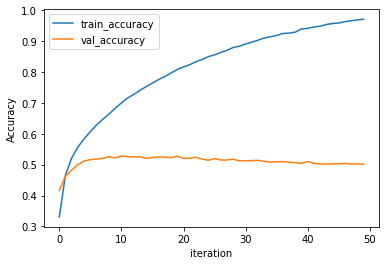

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_data.history['accuracy'], label = "train_accuracy")
plt.plot(history_data.history['val_accuracy'], label = "val_accuracy")
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()